# CREDIT EDA CASE STUDY

### PROBLEM UNDERSTANDING

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. As a result, some consumers use it to their advantage by becoming a defaulter. 

Using EDA, we will analyse the patterns and find out the information which will ensure that the reliable customers are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
   -  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
   -  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The dataset provided contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
   -  The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
   -  All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
   -  Approved: The Company has approved loan Application
   -  Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.
   -  Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
   -  Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, EDA will be performed to understand how consumer attributes and loan attributes influence the tendency to default.

### BUSINESS OBJECTIVES

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as:
      denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 
This will ensure that the consumers capable of repaying the loan are not rejected. 
Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

#### IMPORTING REQUIRED LIBRARIES

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### READING AND UNDERSTANDING THE DATA

In [3]:
#loading datasets
application_data = pd.read_csv("application_data.csv")
previous_application = pd.read_csv("previous_application.csv")
columns_description = pd.read_csv("columns_description.csv", encoding = 'unicode_escape')

In [4]:
pd.set_option('display.max_columns' , 122)
pd.set_option('display.max_rows' , 307511)

### CHECKING DATASET

#### APPLICATION_DATA

First we will see the application_data file

In [5]:
#shape of the dataset
application_data.shape

(307511, 122)

In [6]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


#### REVIEWING AND DELETING UNWANTED COLUMNS

In [8]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
application_data.isnull().sum()/len(application_data)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In the previous_data file we have a lot of columns who have null values greater than 20%. Hence we will delete these columns to ensure the quality of the dataset.

In [10]:
#obtaining all the columns present in the application_data file
col_list = application_data.columns.values.tolist()
col_list

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [11]:
#listing all unwanted columns
unwanted_cols = ['NAME_TYPE_SUITE','DAYS_REGISTRATION', 'OWN_CAR_AGE',
            'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',                  
            'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG',
            'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
            'COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
            'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG',
            'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE',
            'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
            'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
            'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
            'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI',
            'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
            'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI',
            'LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE',
            'HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2',
            'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
            'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
            'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
            'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE',
            'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
            'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
            'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [12]:
#dropping all unwanted columns
application_data.drop(columns = unwanted_cols, inplace = True)

We have dropped all the columns having high percentage of null values to ensure the quality of the dataset and for unbiased analysis. After having a review at the file 'columns_description' we have removed those columns as well which plays a very little importance to reach to the conclusion.

In [13]:
#checking updated list
col_list1=application_data.columns.values.tolist()
col_list1

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE']

In [14]:
application_data.shape

(307511, 34)

In [15]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

After removing all the unwanted columns and after reviewing the updated list we come across four heads namely 'AMT_ANNUITY, AMT_GOODS_PRICE, OWN_CAR_AGE, OCCUPATION_TYPE, CNT_FAM_MEMBERS' which has null values. Since they are one of the important columns we will replace the null values with either mean, median or mode.                                                                
[For numerical data we replace it with either mean or median of that column and for categorical data we replace it by finding mode]

In [16]:
#AMT_ANNUITY
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [17]:
application_data["AMT_ANNUITY"] = application_data["AMT_ANNUITY"].fillna(application_data["AMT_ANNUITY"].mean())

In [18]:
application_data['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.573909
std       14493.454517
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [19]:
#AMT_GOODS_PRICE
application_data["AMT_GOODS_PRICE"] = application_data["AMT_GOODS_PRICE"].fillna(application_data["AMT_GOODS_PRICE"].mean())

In [20]:
#CNT_FAM_NUMBERS
application_data["CNT_FAM_MEMBERS"] = application_data["CNT_FAM_MEMBERS"].fillna(application_data["CNT_FAM_MEMBERS"].mean())

Since AMT_ANNUITY, AMT_GOODS_PRICE, CNT_FAM_MEMBERS have numerical inputs we replace the null values with mean.

In [21]:
#OCCUPATION_TYPE
application_data["OCCUPATION_TYPE"].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [22]:
application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Since 'OCCUPATION_TYPE' has 96391 null values, instead of replacing them with mode we will delete the rows having NA values.

In [23]:
#dropping the rows for the head OCCUPATION_TYPE having null values
application_data.dropna(subset=['OCCUPATION_TYPE'], inplace=True)

In [24]:
application_data.shape

(211120, 34)

In [25]:
application_data.CODE_GENDER.value_counts()

F      129282
M       81836
XNA         2
Name: CODE_GENDER, dtype: int64

Since 'CODE_GENDER' has two XNA values hence we will delete those two rows

In [26]:
application_data = application_data[~(application_data['CODE_GENDER'] == 'XNA')]

In [27]:
application_data.CODE_GENDER.value_counts()

F    129282
M     81836
Name: CODE_GENDER, dtype: int64

In [28]:
application_data.shape

(211118, 34)

In [29]:
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

We no more have any heads which has any null values, and hence we will proceed with the analysis part.

In [30]:
application_data.NAME_FAMILY_STATUS.value_counts()

Married                 137998
Single / not married     32451
Civil marriage           21981
Separated                13239
Widow                     5447
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [31]:
application_data = application_data[~(application_data['NAME_FAMILY_STATUS'] == 'Unknown')]

In [32]:
application_data.NAME_FAMILY_STATUS.value_counts()

Married                 137998
Single / not married     32451
Civil marriage           21981
Separated                13239
Widow                     5447
Name: NAME_FAMILY_STATUS, dtype: int64

## ANALYSIS

We will start with the column 'TARGET' 

In [33]:
application_data['TARGET'].value_counts()

0    192569
1     18547
Name: TARGET, dtype: int64

It basically has two vale counts which are 0 and 1.                                     
From the columns_description data :  
1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample   
0 - all other cases

In [34]:
application_data['TARGET'].value_counts(normalize=True)

0    0.912148
1    0.087852
Name: TARGET, dtype: float64

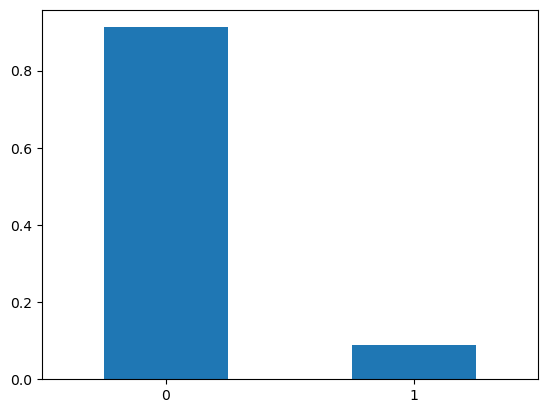

In [35]:
(application_data.TARGET.value_counts()/ len(application_data)).plot.bar()
plt.xticks(rotation=0)
plt.show()

The above graph describes that the target = 0 i.e., clients having payment difficulties are approximately 9 times than the clients having payment difficulties.

We will divide 'TARGET' into two different sections based on its value counts for simpler and indepth analysis.

In [36]:
target_0=application_data[application_data['TARGET']==0]

In [37]:
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,1,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,1,1,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,1,1,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-477,1,1,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other


In [38]:
target_0.shape

(192569, 34)

In [39]:
target_1=application_data[application_data['TARGET']==1]

In [40]:
target_1.shape

(18547, 34)

In [41]:
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,1,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-1827,1,1,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1029,1,1,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-4409,1,1,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,585000.0,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,-10526,-267,-3190,1,1,Sales staff,2.0,2,2,SUNDAY,12,0,1,1,0,1,1,Trade: type 2


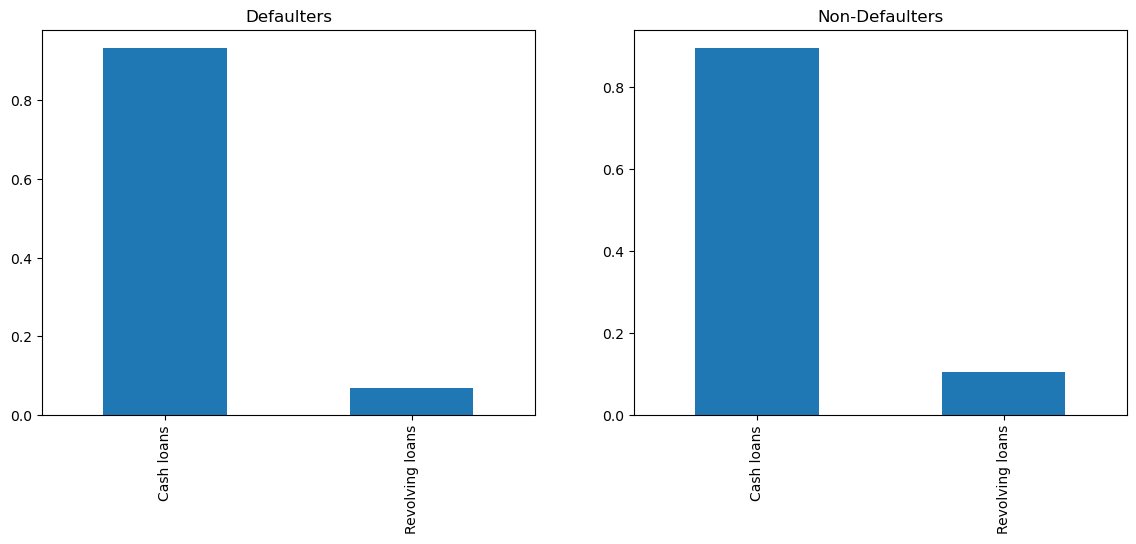

In [42]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)  
target_1.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.bar()
plt.title('Defaulters')

plt.subplot(1,2,2)
target_0.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.bar()
plt.title('Non-Defaulters')

plt.show()

NAME_CONTRACT_TYPE has two values Cash Loan and Revolving Loans. We can observe that clients taking cash loans have the highest anout of defaulters as well as non defaulters
However we observe that for revolving loans there is high percentage for non-defaulters than for defaulters.
But in both the cases Cash Loans are preferred.

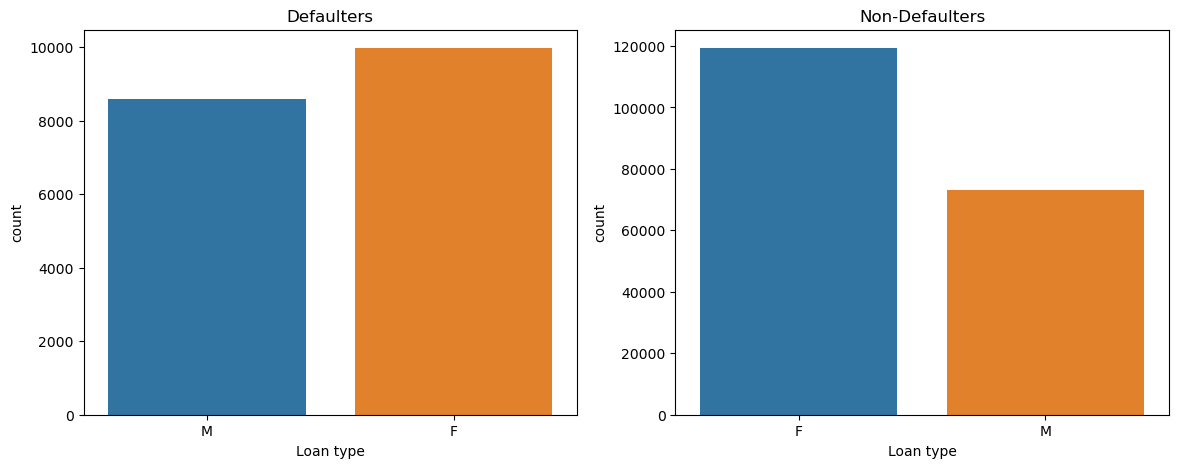

In [43]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=target_1)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')

plt.show()

For the both cases as defaulters and non-defaulters the count of women is greater.

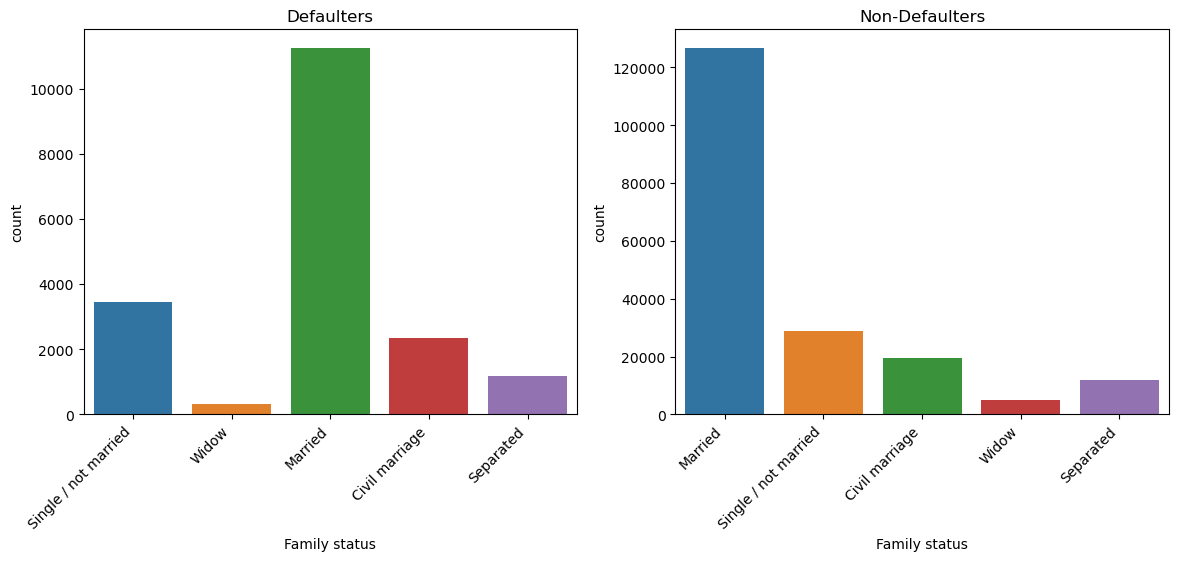

In [44]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=target_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Married section from the column 'NAME_FAMILY_STATUS has the highest defaulters as well as non defaulters. With least defaulters and non defaulters being Widow section.

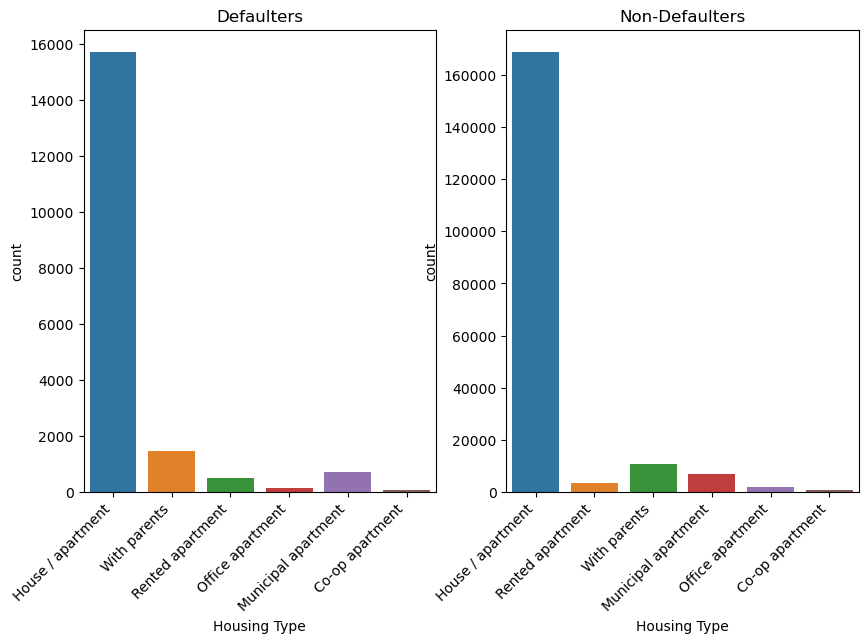

In [45]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
ax = sns.countplot(x = 'NAME_HOUSING_TYPE',data=target_1)
plt.title('Defaulters')
ax.set(xlabel='Housing Type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_HOUSING_TYPE',data=target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Housing Type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.show()

Highest number of Defaulters as well as Non-Defaulters is House/Apartmentimplying that people falling in this category intend to take more loans.

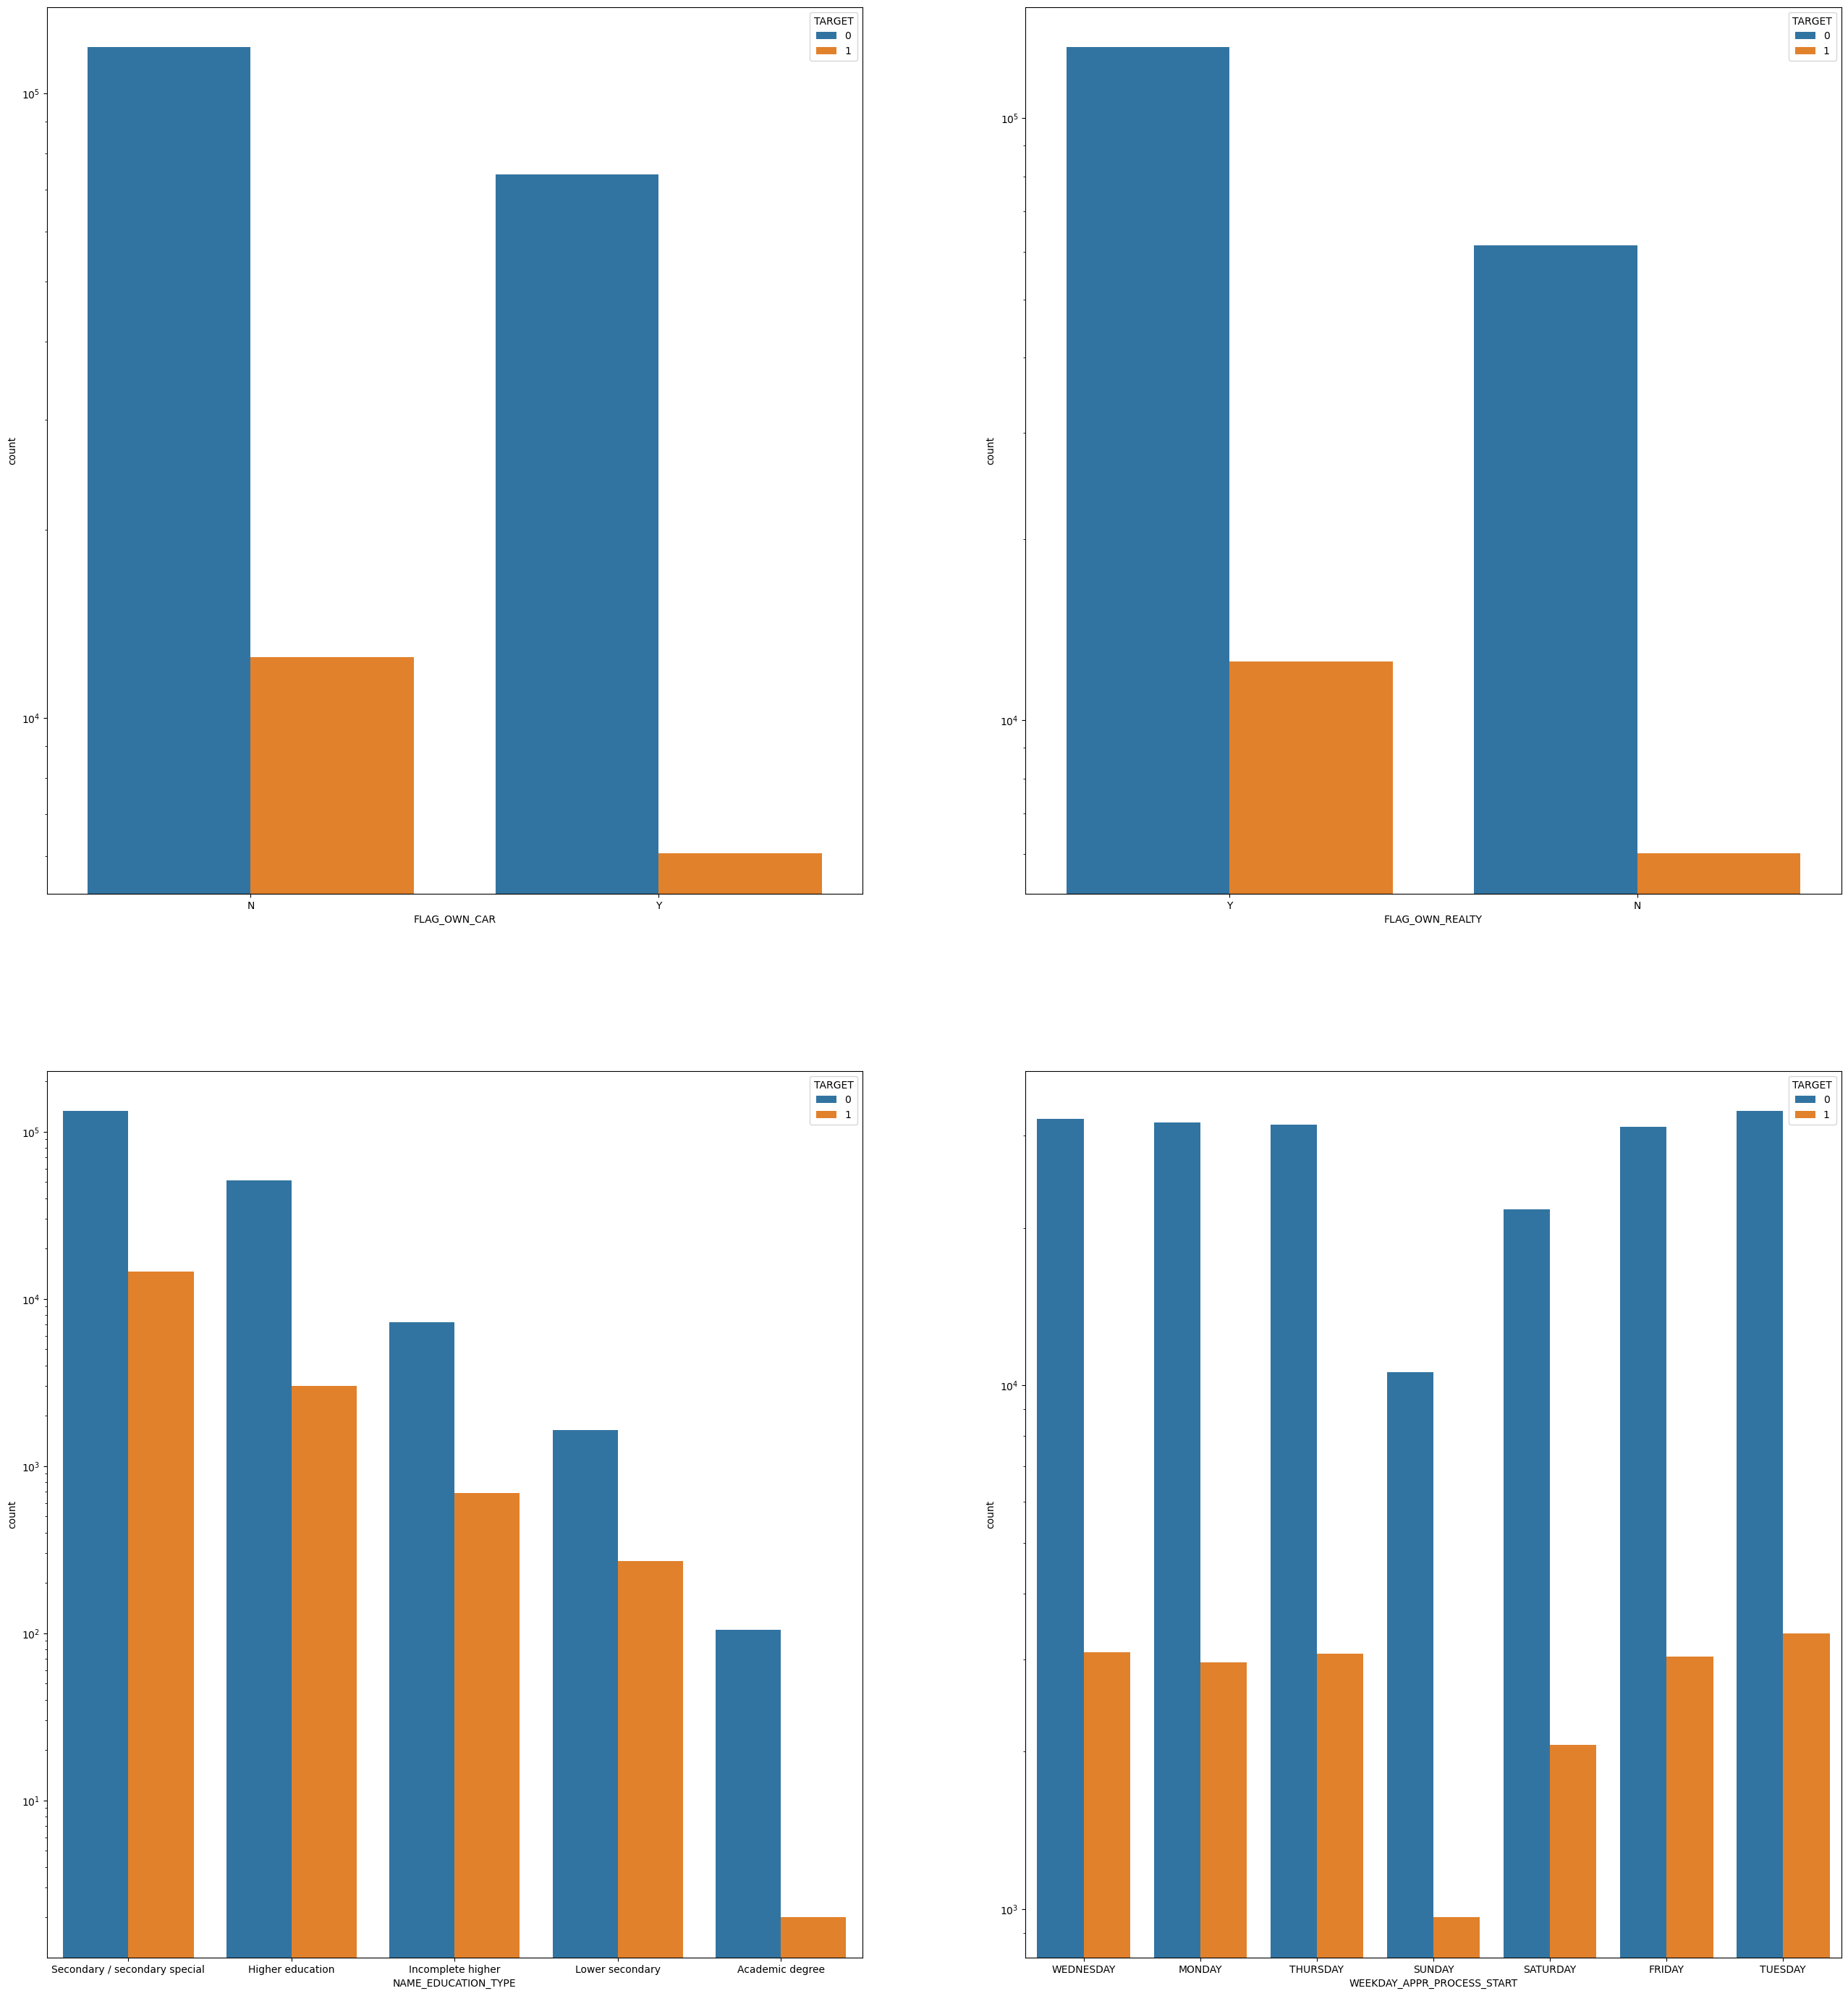

In [46]:
categorical_columns=['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','WEEKDAY_APPR_PROCESS_START']

plt.figure(figsize=(32,35))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=application_data)
    plt.yscale('log')
    
plt.show()

We can see that weekend i.e., Satrdays and Sundays are less busy for banks as the amount of loan applications are less when compared to weekdays.
We can also conclude that Secondary/Secondary Special in 'NAME_EDUCATION_TYPE' apply loans which are higher in number.
People owning real estates tnd to take more loans when compared to people owning cars.

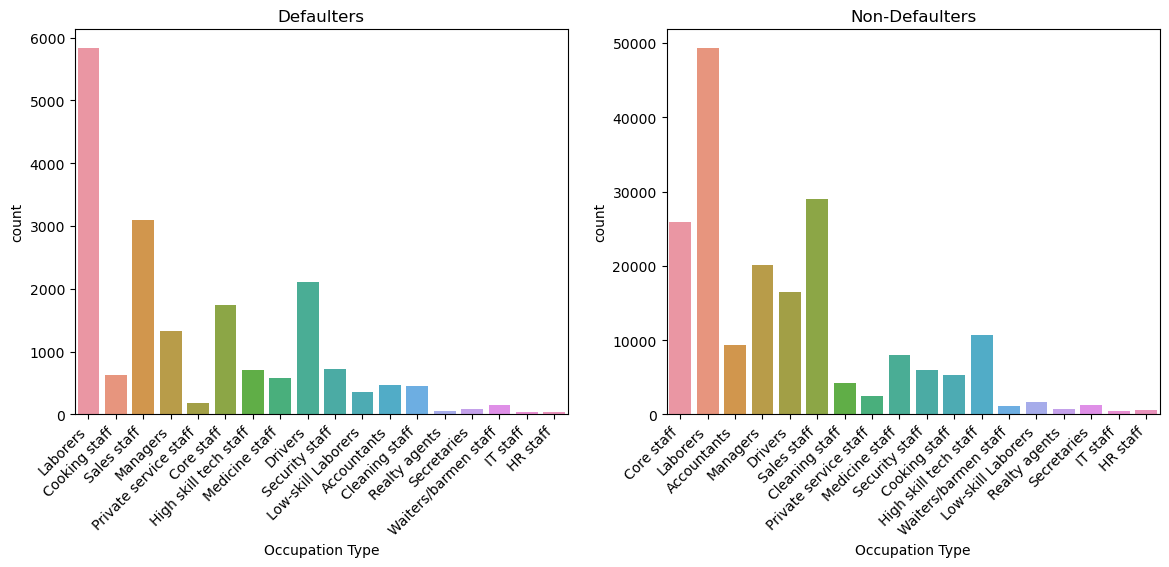

In [47]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=target_1)
plt.title('Defaulters')
ax.set(xlabel='Occupation Type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Occupation Type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Laborers tend to take more loans when compared to other categories.

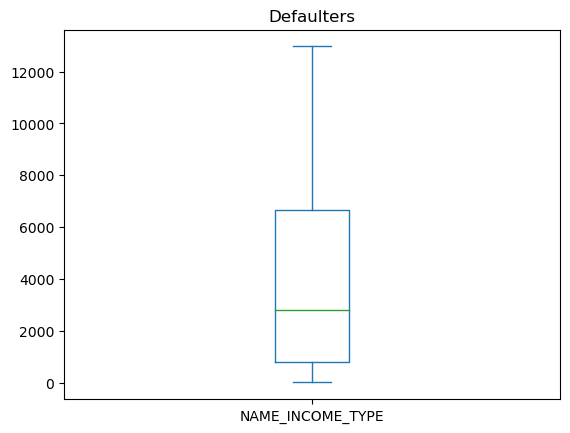

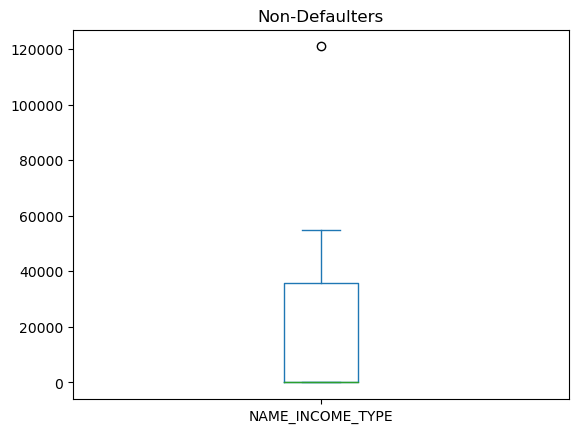

In [48]:
target_1.NAME_INCOME_TYPE.value_counts().plot.box()
plt.title('Defaulters')
plt.show()

target_0.NAME_INCOME_TYPE.value_counts().plot.box()
plt.title('Non-Defaulters')
plt.show()

We see that for defaulters the median lies around 3000 however the median for Non-Defaulters is 0 implying that the whole of the data lies in the range from 0 to approximately 4000 whereas for defaulters half of the daa lies in the range 0 to 3500 and other half from 3500 to 6000 and above. 

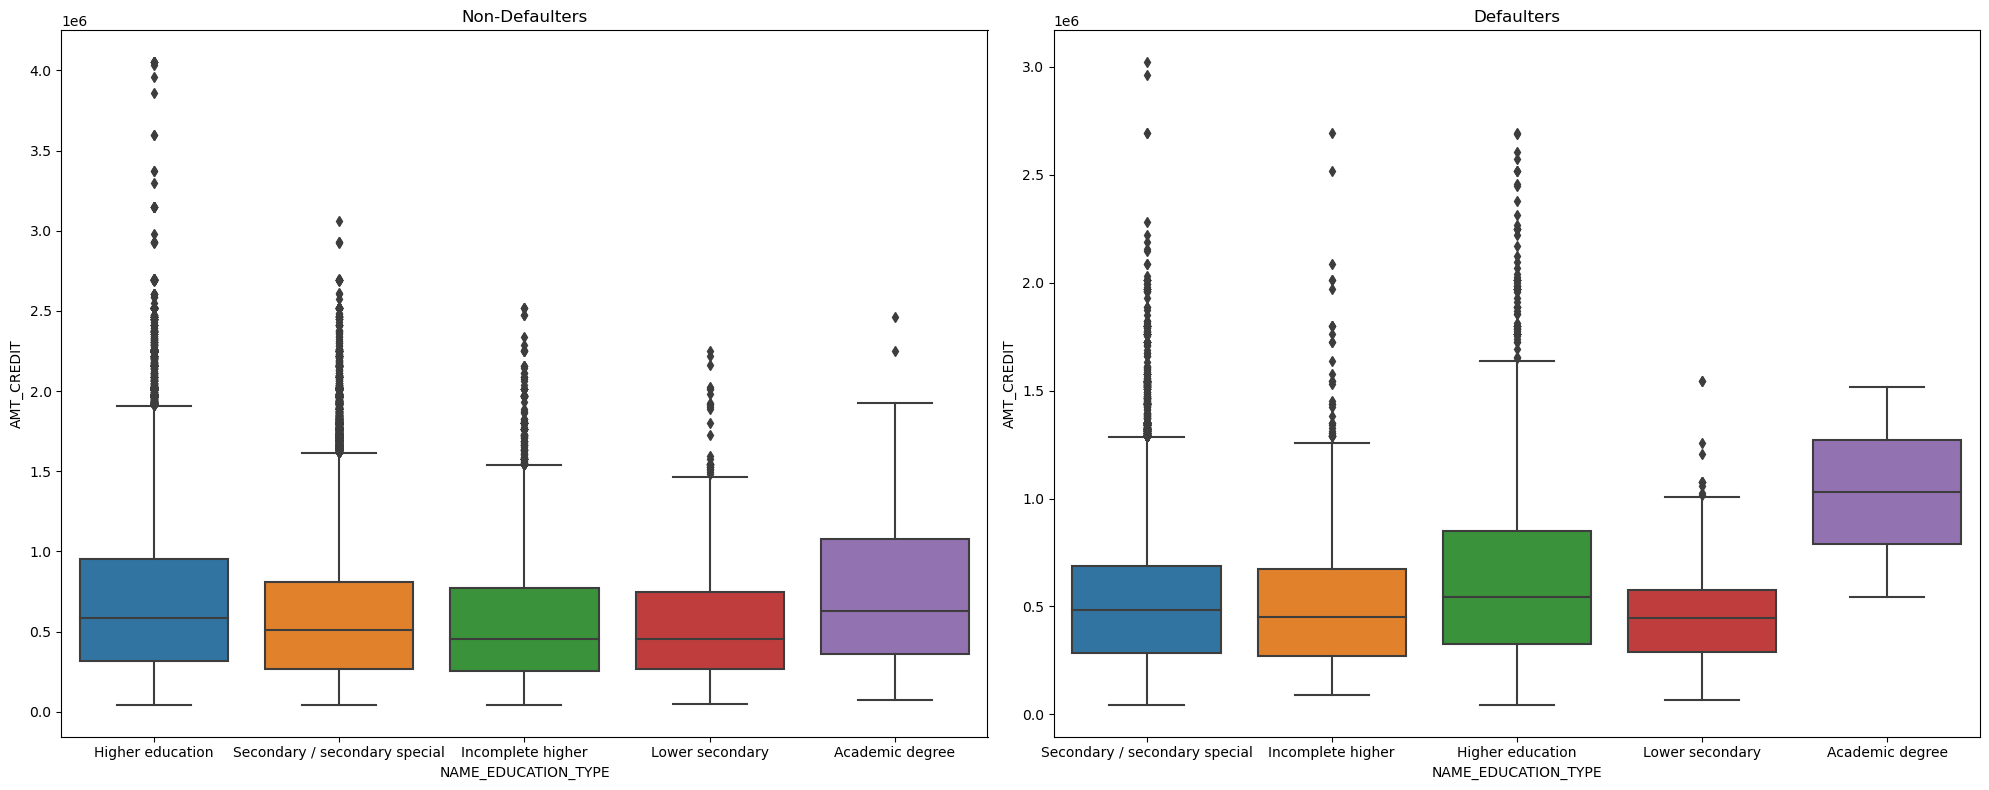

In [49]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.boxplot(data=target_1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Defaulters')
plt.tight_layout()
plt.show()

Here we got the box plots for the Education Type based on the Credit Amount. We see a lot of outliers for every section except for Academic Degree.

In [50]:
target_0.CNT_CHILDREN.value_counts()

0     123242
1      45795
2      20450
3       2717
4        283
5         58
6          8
7          7
8          2
12         2
19         2
14         2
10         1
Name: CNT_CHILDREN, dtype: int64

In [51]:
target_1.CNT_CHILDREN.value_counts()

0     11625
1      4597
2      1966
3       303
4        43
5         6
6         4
9         2
11        1
Name: CNT_CHILDREN, dtype: int64

In [52]:
application_data.groupby("TARGET")["CNT_CHILDREN"].mean()

TARGET
0    0.501020
1    0.522618
Name: CNT_CHILDREN, dtype: float64

In [53]:
application_data.groupby("TARGET")["CNT_FAM_MEMBERS"].mean()

TARGET
0    2.261241
1    2.255028
Name: CNT_FAM_MEMBERS, dtype: float64

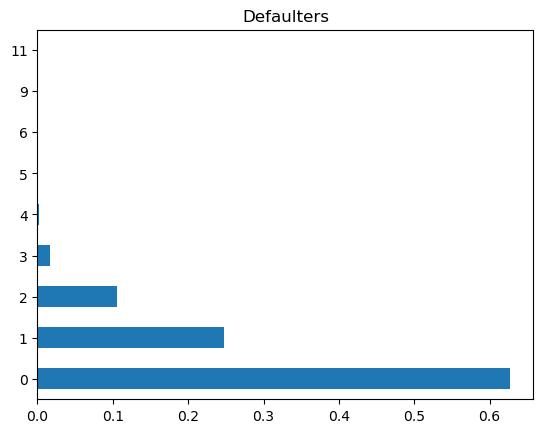

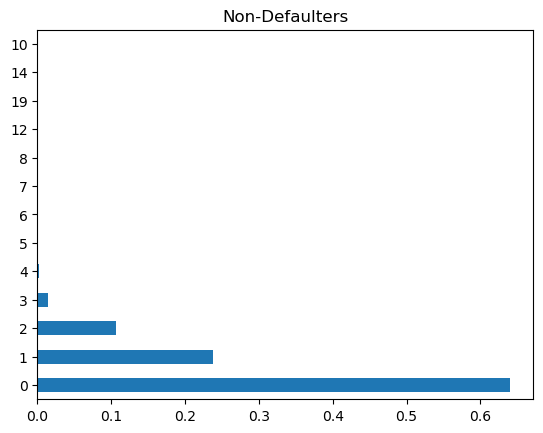

In [54]:
target_1.CNT_CHILDREN.value_counts(normalize = True).plot.barh()
plt.title('Defaulters')
plt.show()

target_0.CNT_CHILDREN.value_counts(normalize = True).plot.barh()
plt.title('Non-Defaulters')
plt.show()

We see that there is approxiately same percentage for the Defaulters and Non - Defaulters with children 0 which is maximum in both both the cases i.e., clients with 0 children are more likely to default and otherwise. 

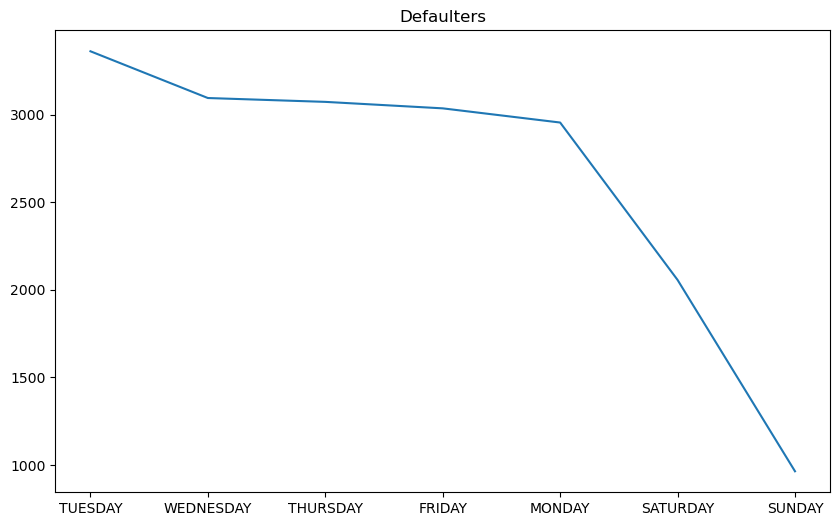

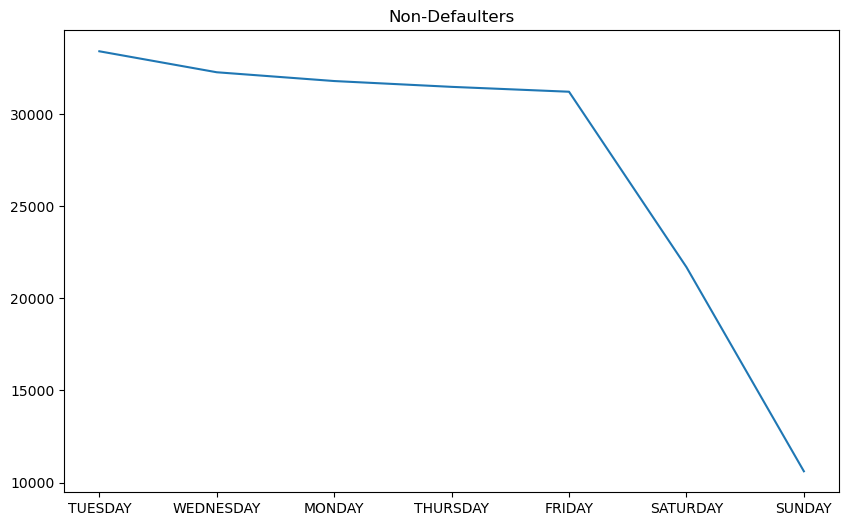

In [55]:
plt.figure(figsize=(10,6))
target_1.WEEKDAY_APPR_PROCESS_START.value_counts().plot.line()
plt.title('Defaulters')
plt.show()
plt.figure(figsize=(10,6))
target_0.WEEKDAY_APPR_PROCESS_START.value_counts().plot.line()
plt.title('Non-Defaulters')
plt.show()

As we concluded earlier, we can clearly see from the line graph that the amount of applications are on Tuesday for both the cases and falls for Saturday and Sunday.

In [56]:
application_data.groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].mean()

CODE_GENDER
F    162087.349551
M    197395.900372
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: xlabel='CODE_GENDER'>

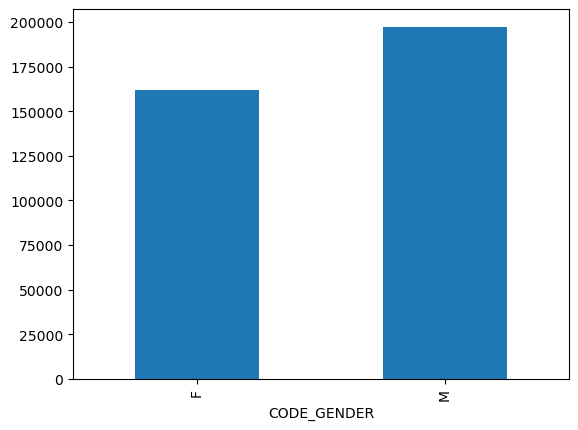

In [57]:
application_data.groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].mean().plot.bar()

We can see here that despite female count being more than male the mean for male is greater when we group by AMT_INCOME_TOTAL showing that male earns more than female

<Axes: title={'center': 'Non Defaulters'}, xlabel='DAYS_EMPLOYED', ylabel='Density'>

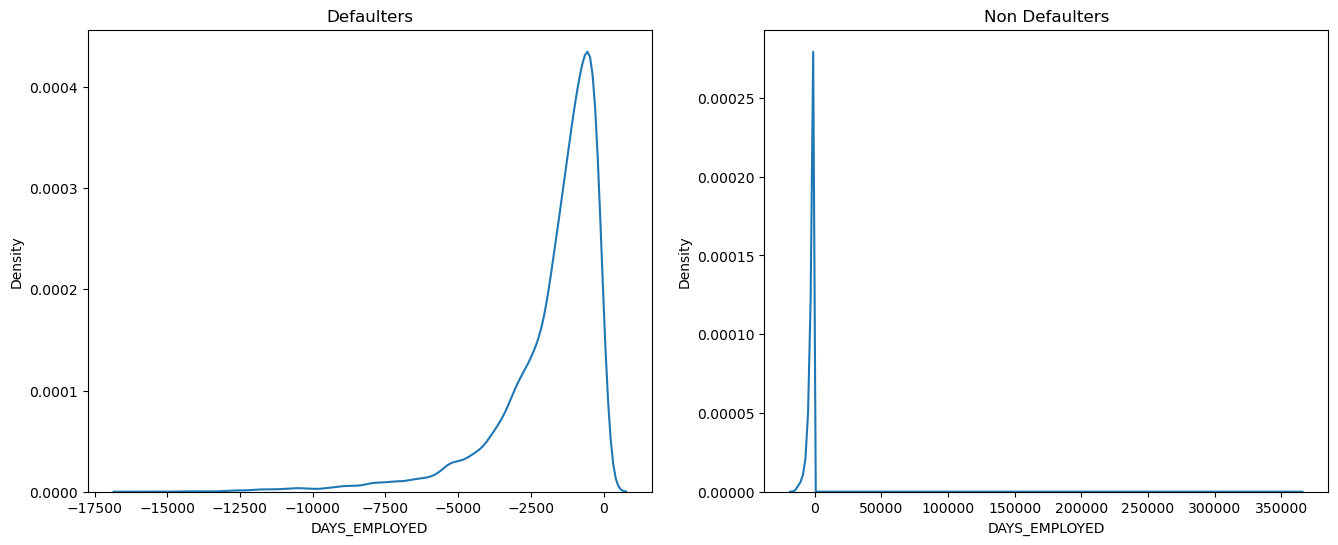

In [58]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(target_1['DAYS_EMPLOYED'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(target_0['DAYS_EMPLOYED'],hist=False)

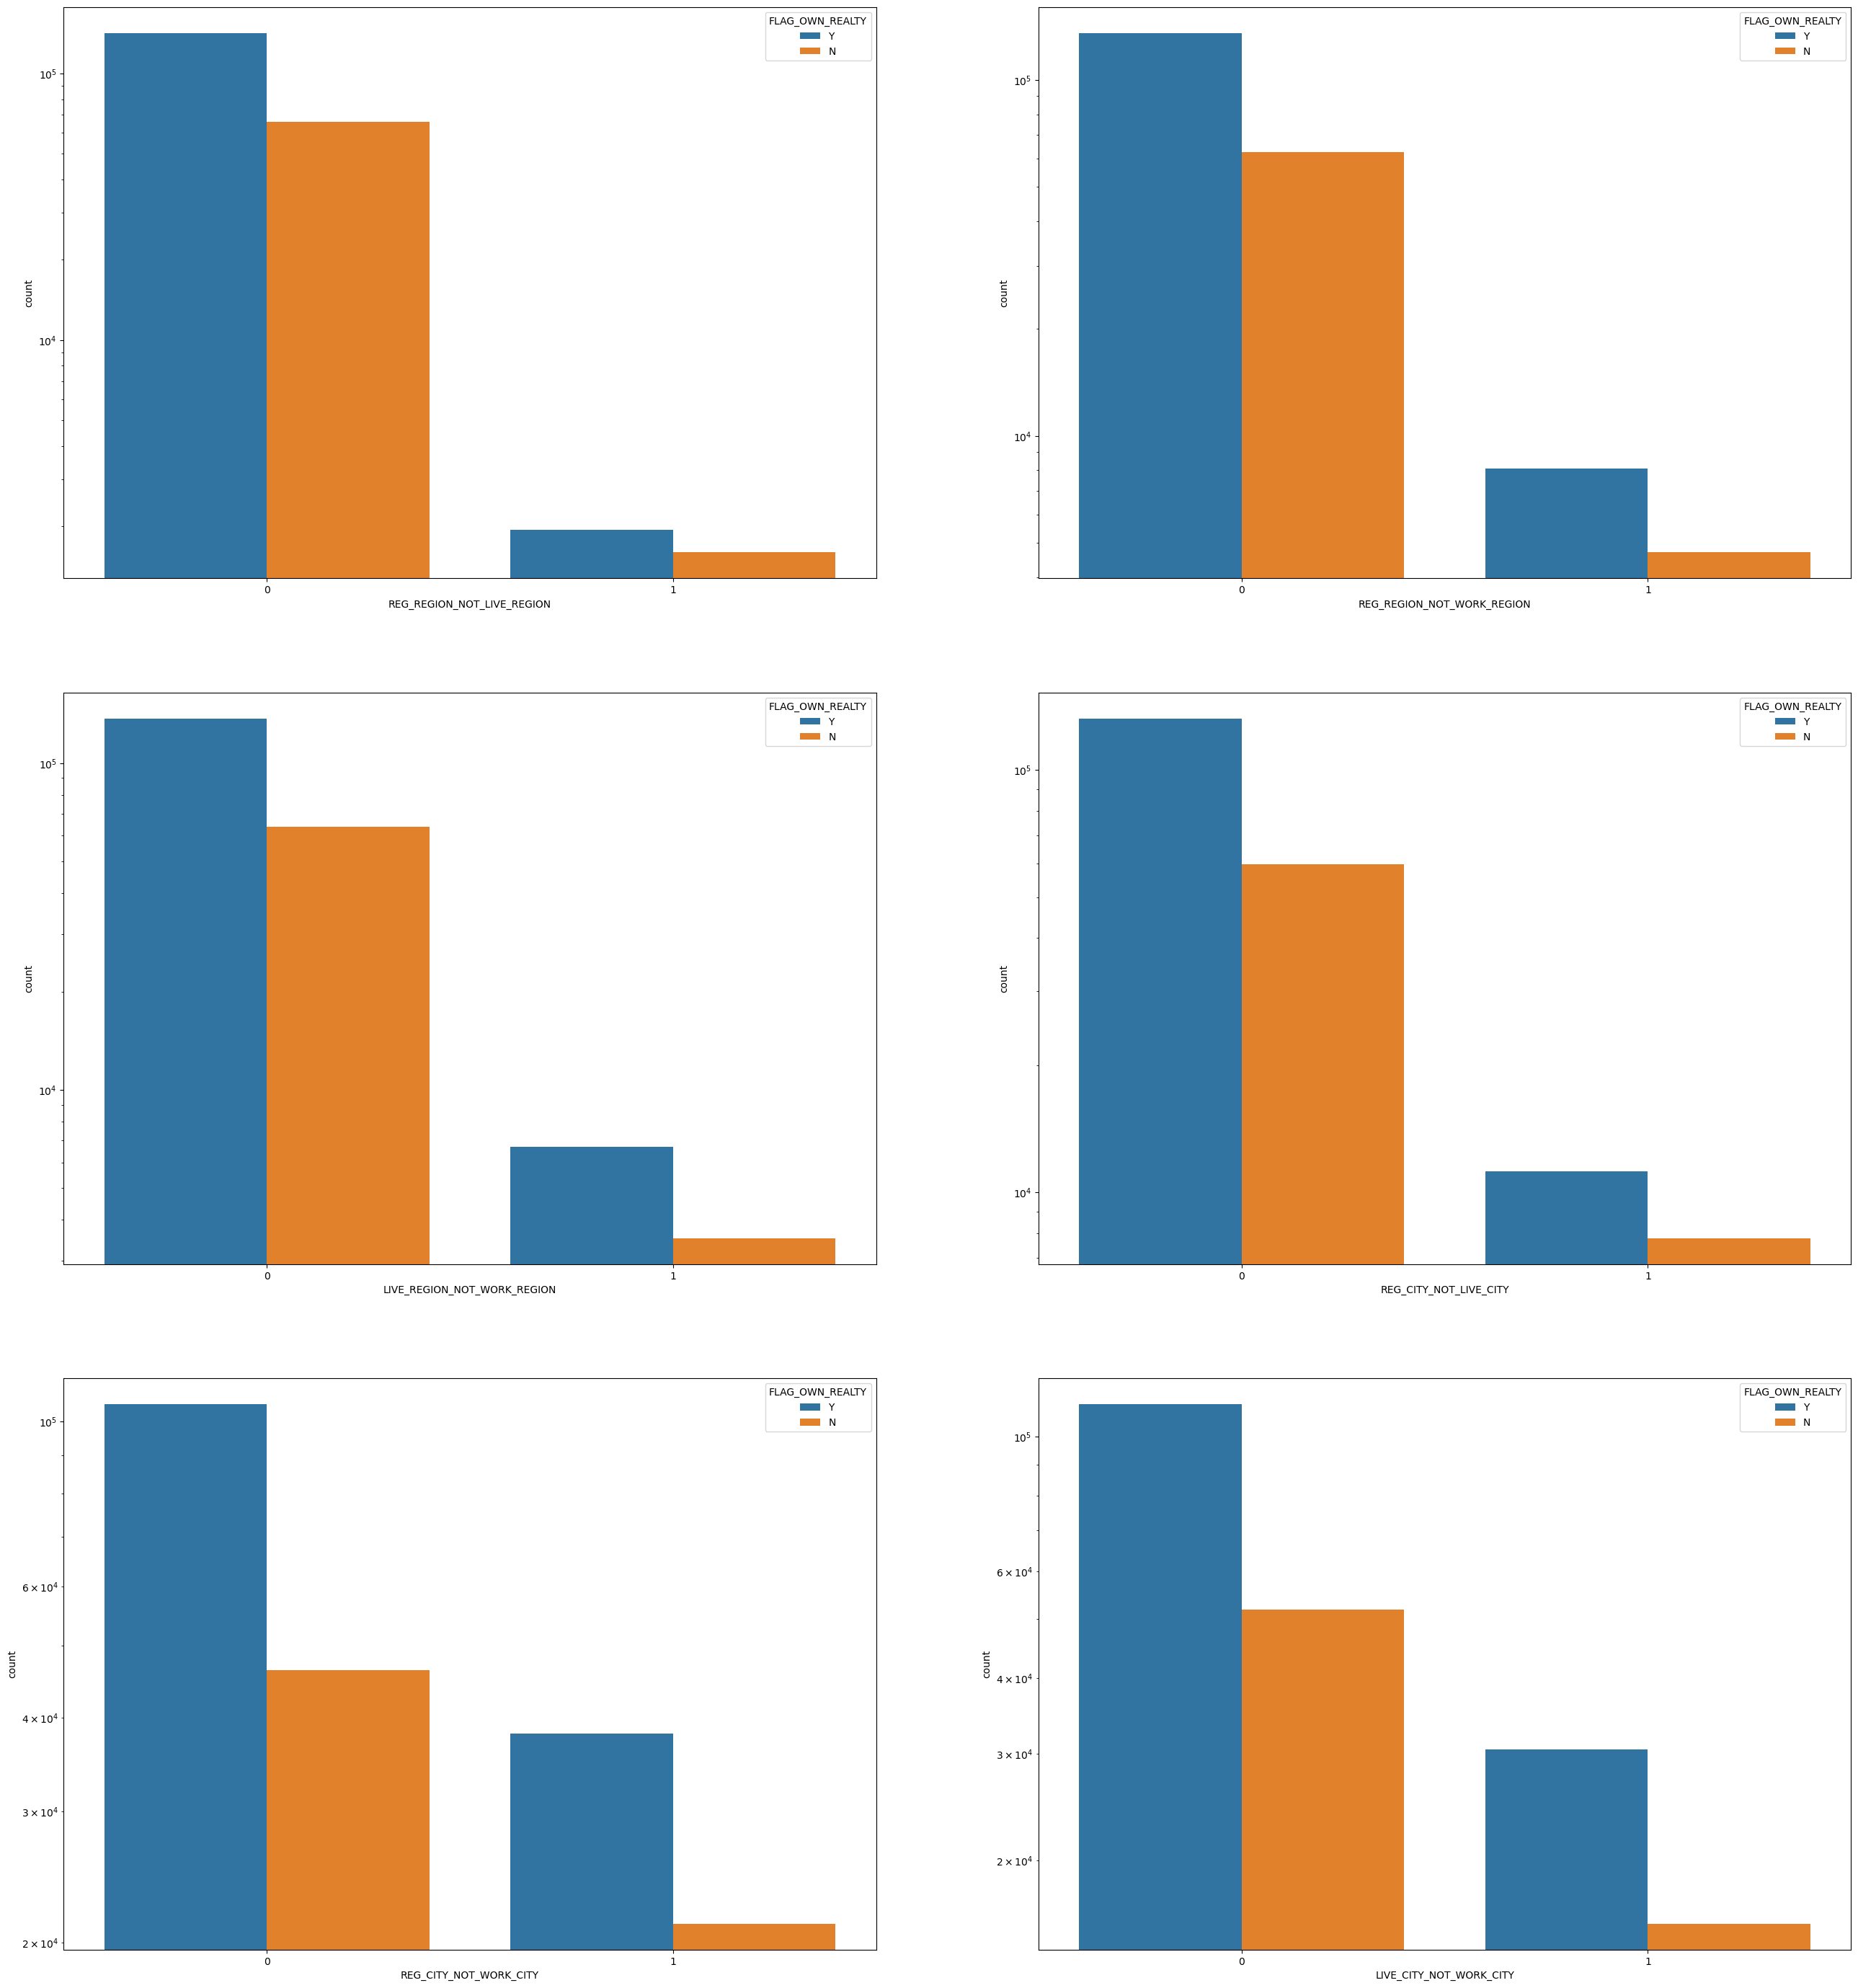

In [59]:
categorical_columns=['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                     'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

plt.figure(figsize=(32,35))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='FLAG_OWN_REALTY',data=application_data)
    plt.yscale('log')
    
plt.show()


In [60]:
#finding the correlation between the region and city 
corr_cols = ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
             'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

In [61]:
corr_target_1 = target_1[corr_cols]
corr_target_1.head()

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0,0,0,0,0,0
26,0,0,0,0,0,0
40,0,0,0,0,0,0
42,0,0,0,0,0,0
110,0,1,1,0,1,1


In [62]:
corr_target_1.corr()

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
REG_REGION_NOT_LIVE_REGION,1.000000,0.510164,0.055473,0.317277,0.152196,-0.016744
REG_REGION_NOT_WORK_REGION,0.510164,1.000000,0.843485,0.139588,0.221388,0.177039
LIVE_REGION_NOT_WORK_REGION,0.055473,0.843485,1.000000,-0.012254,0.164415,0.229950
REG_CITY_NOT_LIVE_CITY,0.317277,0.139588,-0.012254,1.000000,0.482577,-0.028865
REG_CITY_NOT_WORK_CITY,0.152196,0.221388,0.164415,0.482577,1.000000,0.764834
LIVE_CITY_NOT_WORK_CITY,-0.016744,0.177039,0.229950,-0.028865,0.764834,1.000000


<Axes: >

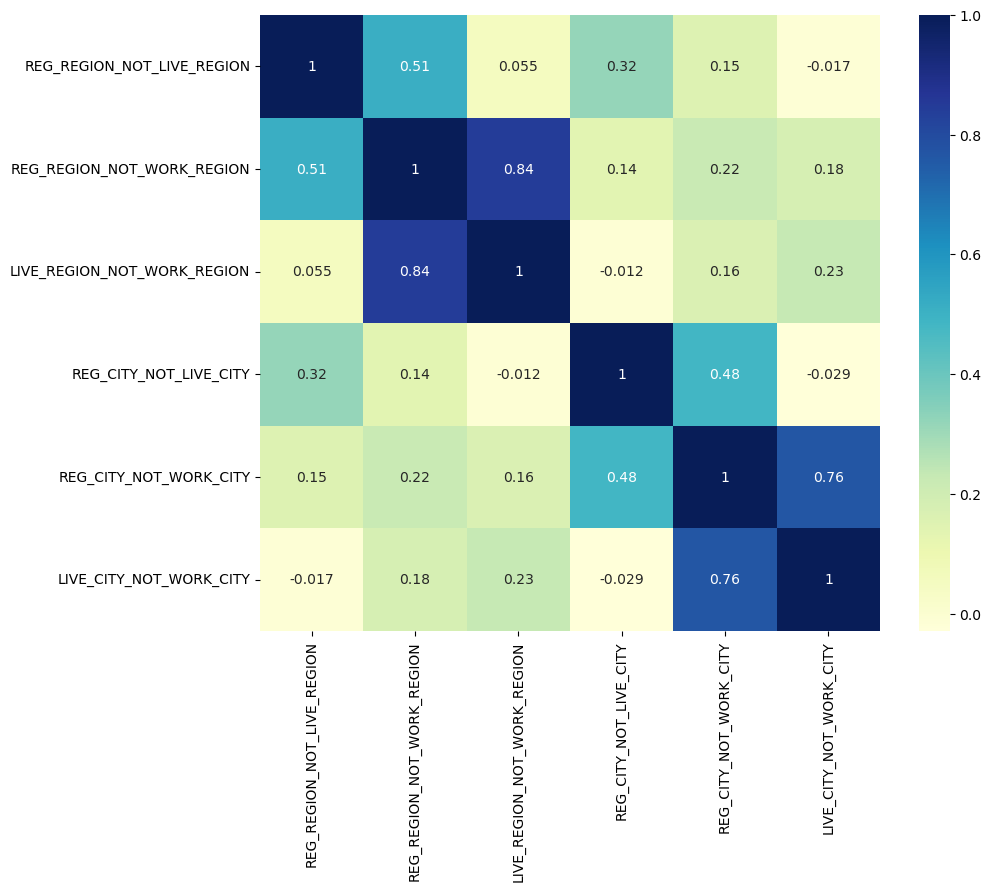

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_target_1.corr(),cmap="YlGnBu",annot=True)

Here we found the correlation between the work address and residence address and we find that the highest corelation is between REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION

### PREVIOUS_APPLICATION DATASET

Now we will see the previous_application dataset

In [64]:
#shape of the dataset
previous_application.shape

(1670214, 37)

In [65]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
previous_application.isnull().sum()/len(application_data)*100

SK_ID_PREV                       0.000000
SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
AMT_ANNUITY                    176.317759
AMT_APPLICATION                  0.000000
AMT_CREDIT                       0.000474
AMT_DOWN_PAYMENT               424.337331
AMT_GOODS_PRICE                182.608140
WEEKDAY_APPR_PROCESS_START       0.000000
HOUR_APPR_PROCESS_START          0.000000
FLAG_LAST_APPL_PER_CONTRACT      0.000000
NFLAG_LAST_APPL_IN_DAY           0.000000
RATE_DOWN_PAYMENT              424.337331
RATE_INTEREST_PRIMARY          788.316850
RATE_INTEREST_PRIVILEGED       788.316850
NAME_CASH_LOAN_PURPOSE           0.000000
NAME_CONTRACT_STATUS             0.000000
DAYS_DECISION                    0.000000
NAME_PAYMENT_TYPE                0.000000
CODE_REJECT_REASON               0.000000
NAME_TYPE_SUITE                388.603895
NAME_CLIENT_TYPE                 0.000000
NAME_GOODS_CATEGORY              0.000000
NAME_PORTFOLIO                   0

In [67]:
unwanted_cols1 = ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','CNT_PAYMENT', 'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']

We will drop all the unwanted columns as they have a high percentage of null values which affects our dataset.

In [68]:
previous_application.drop(columns = unwanted_cols1, inplace=True)

In [69]:
previous_application.shape

(1670214, 23)

In [70]:
previous_application.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

After checking the null values for the rest of the headings we find that AMT_CREDIT and PRODUCT_COMBINATION has null values present in them.

In [71]:
previous_application["AMT_CREDIT"] = previous_application["AMT_CREDIT"].fillna(previous_application["AMT_CREDIT"].mean())

We replace null value for AMT_CREDIT with the mean and dropping PRODUCT_COMBINATION

In [72]:
previous_application.dropna(subset=['PRODUCT_COMBINATION'], inplace=True)

In [73]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

We will merge both the data files application_data and previous_application to further our analysis.

In [86]:
consolidated_data = pd.merge(left=application_data,right=previous_application,how='inner',on='SK_ID_CURR')

In [87]:
consolidated_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,SK_ID_PREV,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
count,955844.000000,955844.000000,955844.000000,9.558440e+05,9.558440e+05,955844.000000,9.558440e+05,955844.000000,955844.000000,955844.000000,955844.000000,955844.0,955844.000000,955844.000000,955844.000000,955844.000000,955844.000000,955844.000000,955844.000000,955844.000000,955844.000000,955844.000000,955844.000000,9.558440e+05,9.558440e+05,9.558440e+05,955844.000000,955844.000000,955844.000000,9.558440e+05
mean,278608.003320,0.094613,0.497404,1.798042e+05,5.976334e+05,27756.586324,5.363482e+05,0.020557,-14961.398899,-2437.881264,-2830.680186,1.0,0.999946,2.269273,2.057553,2.034991,12.109721,0.013248,0.053367,0.043779,0.085896,0.274829,0.215225,1.922530e+06,1.732159e+05,1.951051e+05,12.642719,0.996255,-886.458813,3.273401e+02
std,102923.646355,0.292679,0.764993,2.288098e+05,3.850198e+05,14009.735037,3.530694e+05,0.013107,3612.182738,2831.552536,1517.364108,0.0,0.007376,0.932861,0.496088,0.489596,3.271153,0.114335,0.224765,0.204603,0.280210,0.446428,0.410979,5.327182e+05,2.962399e+05,3.225680e+05,3.355108,0.061085,783.684606,7.265255e+03
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200.000000,-17912.000000,-7197.000000,1.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000001e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,-2922.000000,-1.000000e+00
25%,189338.750000,0.000000,0.000000,1.125000e+05,2.842560e+05,17509.500000,2.475000e+05,0.010006,-17667.000000,-3240.000000,-4196.000000,1.0,1.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.461390e+06,2.065500e+04,2.573100e+04,10.000000,1.000000,-1324.000000,-1.000000e+00
50%,279133.000000,0.000000,0.000000,1.575000e+05,5.185620e+05,25960.500000,4.500000e+05,0.018850,-14785.000000,-1747.000000,-2945.000000,1.0,1.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.922164e+06,6.826050e+04,7.819650e+04,13.000000,1.000000,-591.000000,1.000000e+01
75%,368078.500000,0.000000,1.000000,2.250000e+05,8.086500e+05,35523.000000,6.840000e+05,0.026392,-12011.000000,-842.000000,-1530.000000,1.0,1.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.384182e+06,1.800000e+05,2.037600e+05,15.000000,1.000000,-276.000000,9.500000e+01
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,1.0,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.845381e+06,4.455000e+06,4.104351e+06,23.000000,1.000000,-1.000000,4.000000e+06


In [88]:
consolidated_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,1,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1038818,Consumer loans,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,1,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1810518,Cash loans,900000.0,1035882.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,1,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,2636178,Consumer loans,337500.0,348637.5,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,1,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,2396755,Consumer loans,68809.5,68053.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,1564014,Consumer loans,24282.0,20106.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest


In [89]:
consolidated_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.831278
Canceled        17.667004
Refused         17.663343
Unused offer     1.838375
Name: NAME_CONTRACT_STATUS, dtype: float64

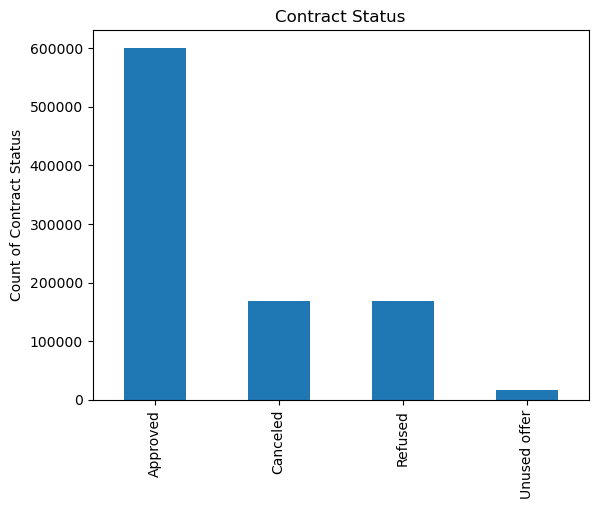

In [90]:
consolidated_data['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
plt.title('Contract Status')
plt.ylabel('Count of Contract Status')
plt.show()

We see that maximum loan applications had been approved previously and the number of refused and canceled loan applications were almost same.

In [91]:
approved_application = consolidated_data[consolidated_data['NAME_CONTRACT_STATUS']=='Approved']
refused_application = consolidated_data[consolidated_data['NAME_CONTRACT_STATUS']=='Refused']
canceled_application=consolidated_data[consolidated_data['NAME_CONTRACT_STATUS']=='Canceled']
unused_application=consolidated_data[consolidated_data['NAME_CONTRACT_STATUS']=='Unused offer']

Since the percentage for unused offer is negligible we will not consider it while analysing furthermore.

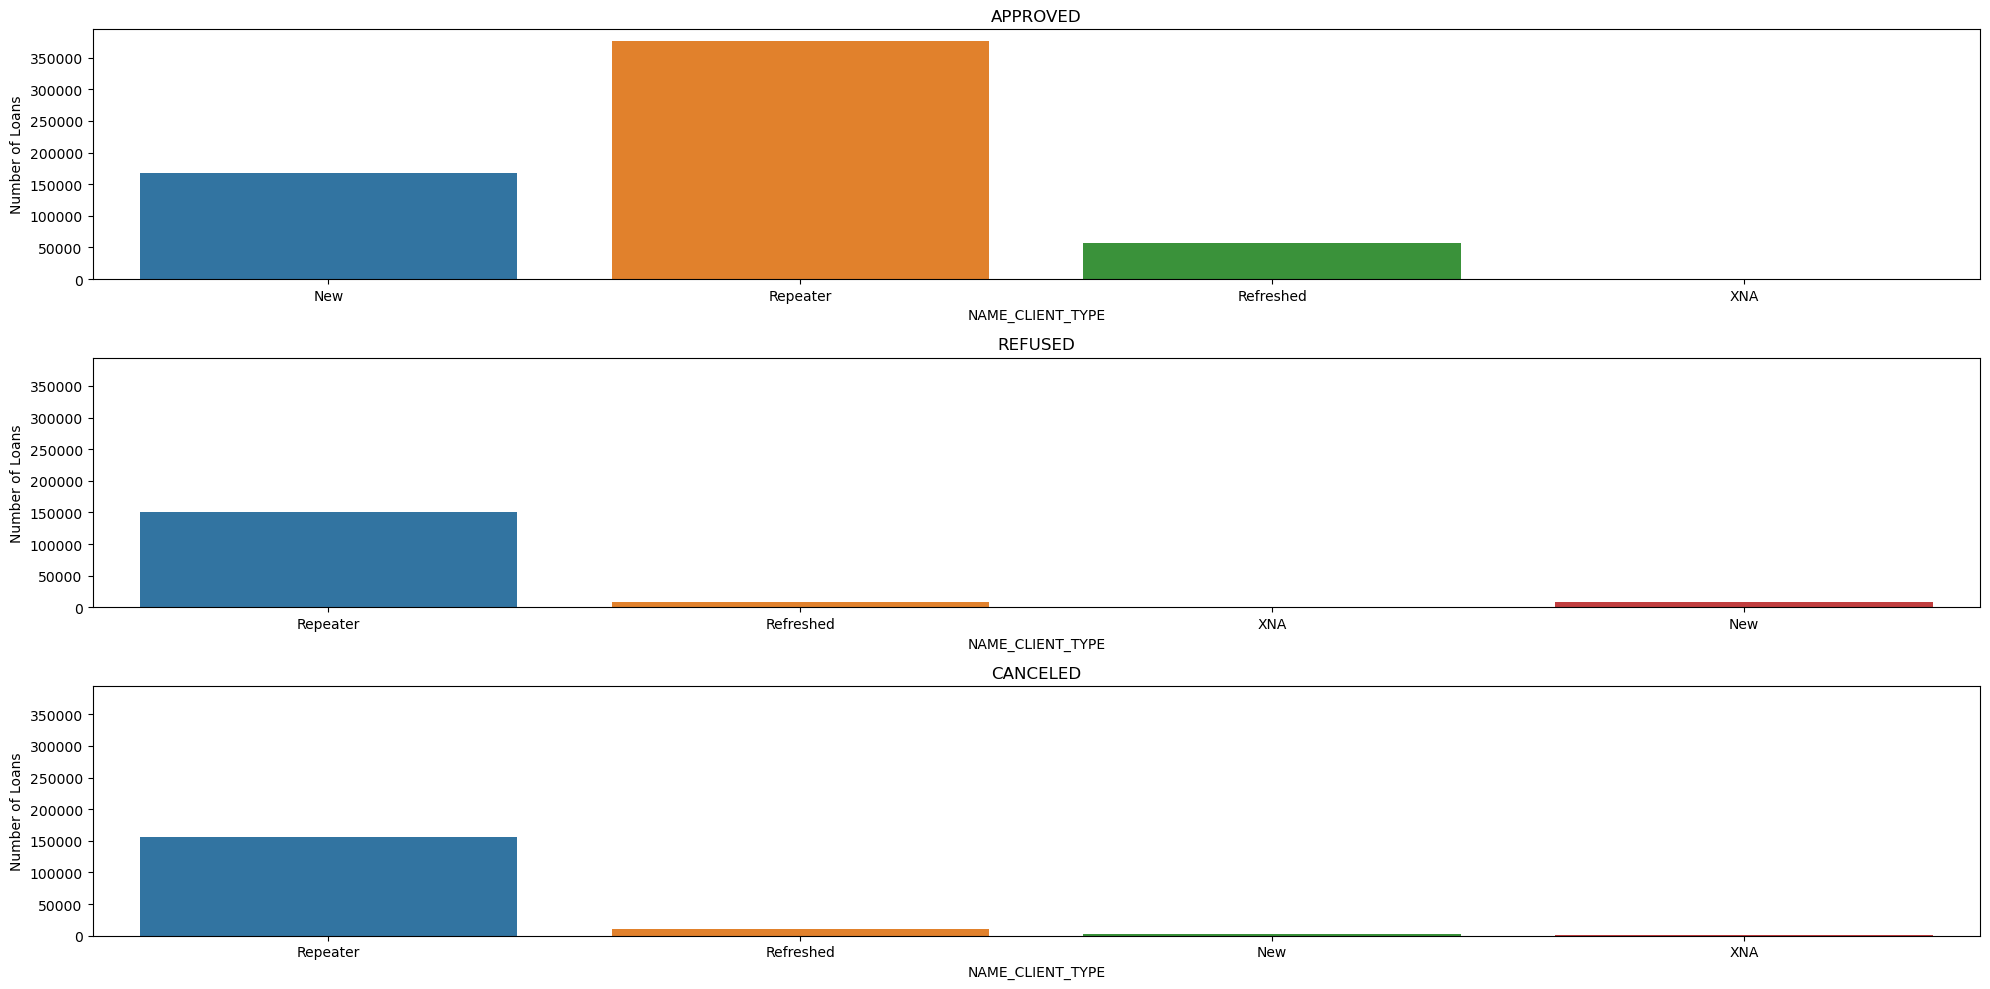

In [92]:
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=3,ncols=1,figsize=(20,10),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_application,x='NAME_CLIENT_TYPE')
ax1.set_title('APPROVED')
ax1.set_xlabel('NAME_CLIENT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_application,x='NAME_CLIENT_TYPE')
ax2.set_title('REFUSED')
ax2.set_xlabel('NAME_CLIENT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_application,x='NAME_CLIENT_TYPE')
ax3.set_title('CANCELED')
ax3.set_xlabel('NAME_CLIENT_TYPE')
ax3.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

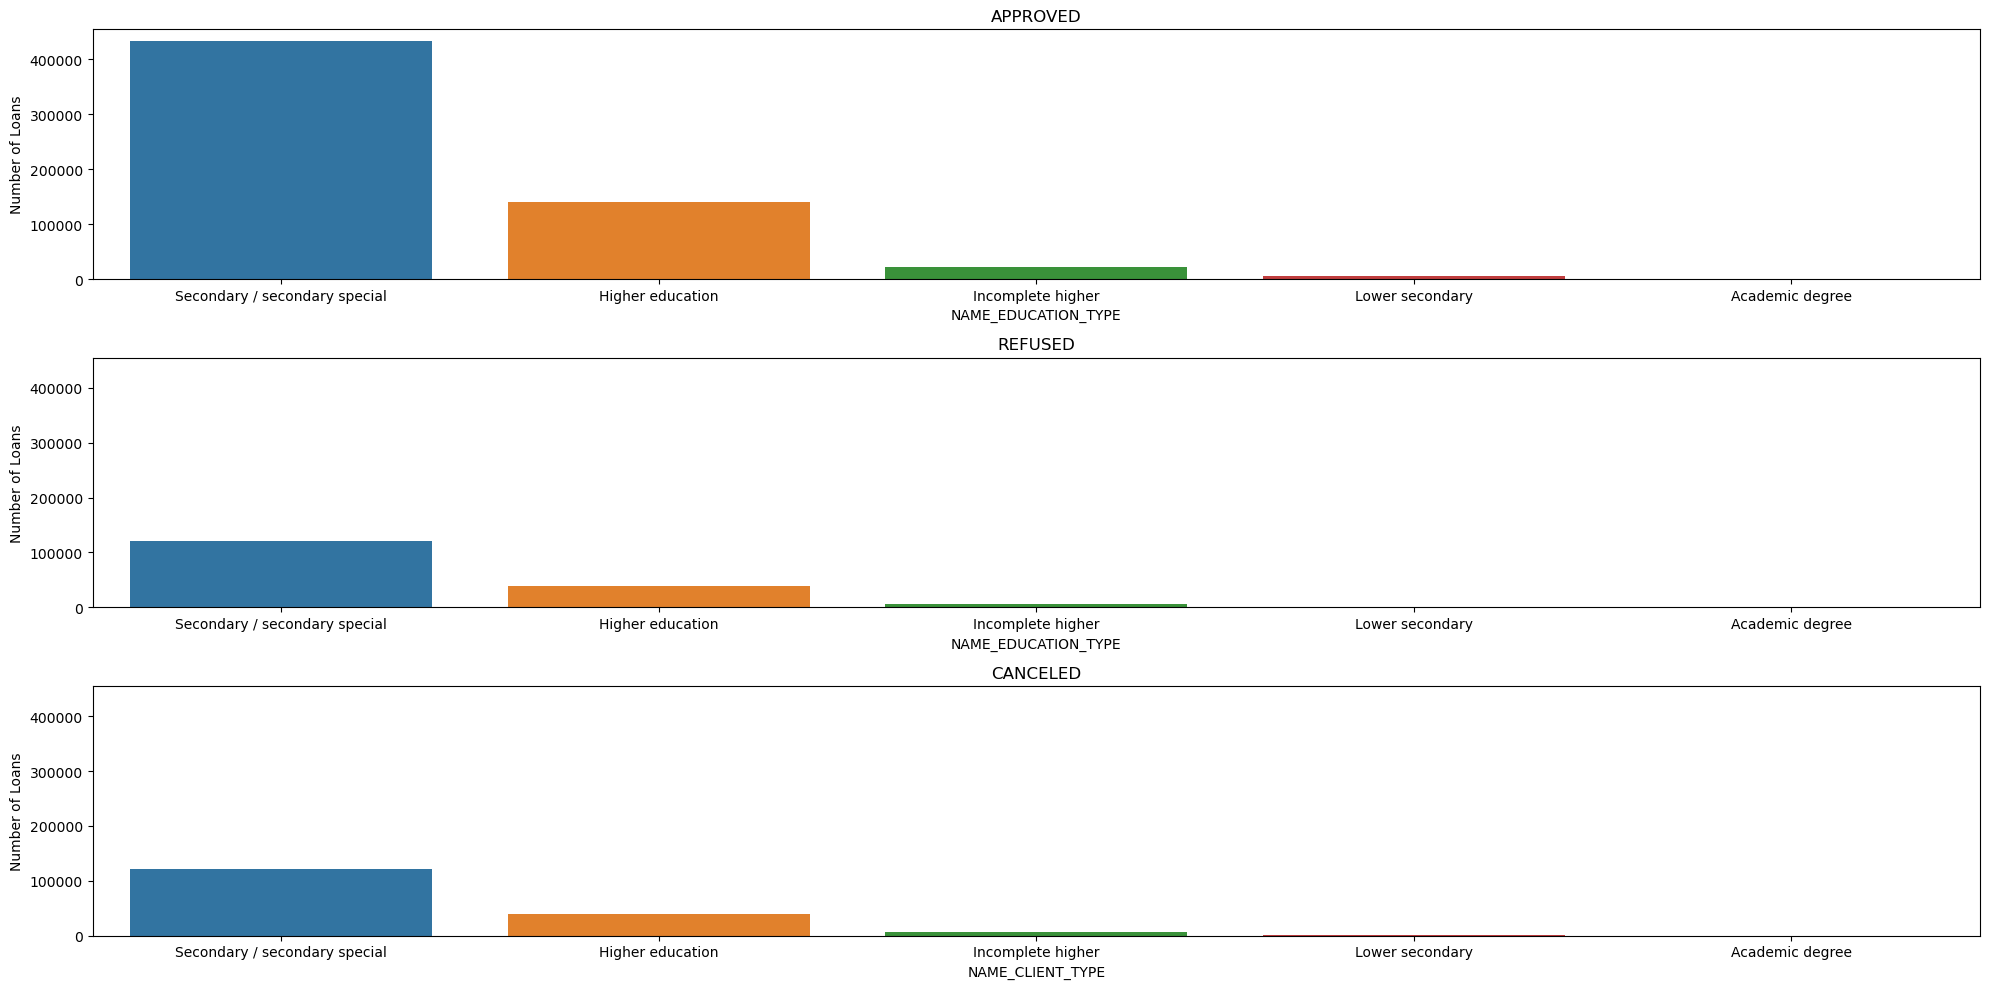

In [93]:
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=3,ncols=1,figsize=(20,10),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_application,x='NAME_EDUCATION_TYPE')
ax1.set_title('APPROVED')
ax1.set_xlabel('NAME_EDUCATION_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_application,x='NAME_EDUCATION_TYPE')
ax2.set_title('REFUSED')
ax2.set_xlabel('NAME_EDUCATION_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_application,x='NAME_EDUCATION_TYPE')
ax3.set_title('CANCELED')
ax3.set_xlabel('NAME_CLIENT_TYPE')
ax3.set_ylabel('Number of Loans')

plt.tight_layout()
plt.show()

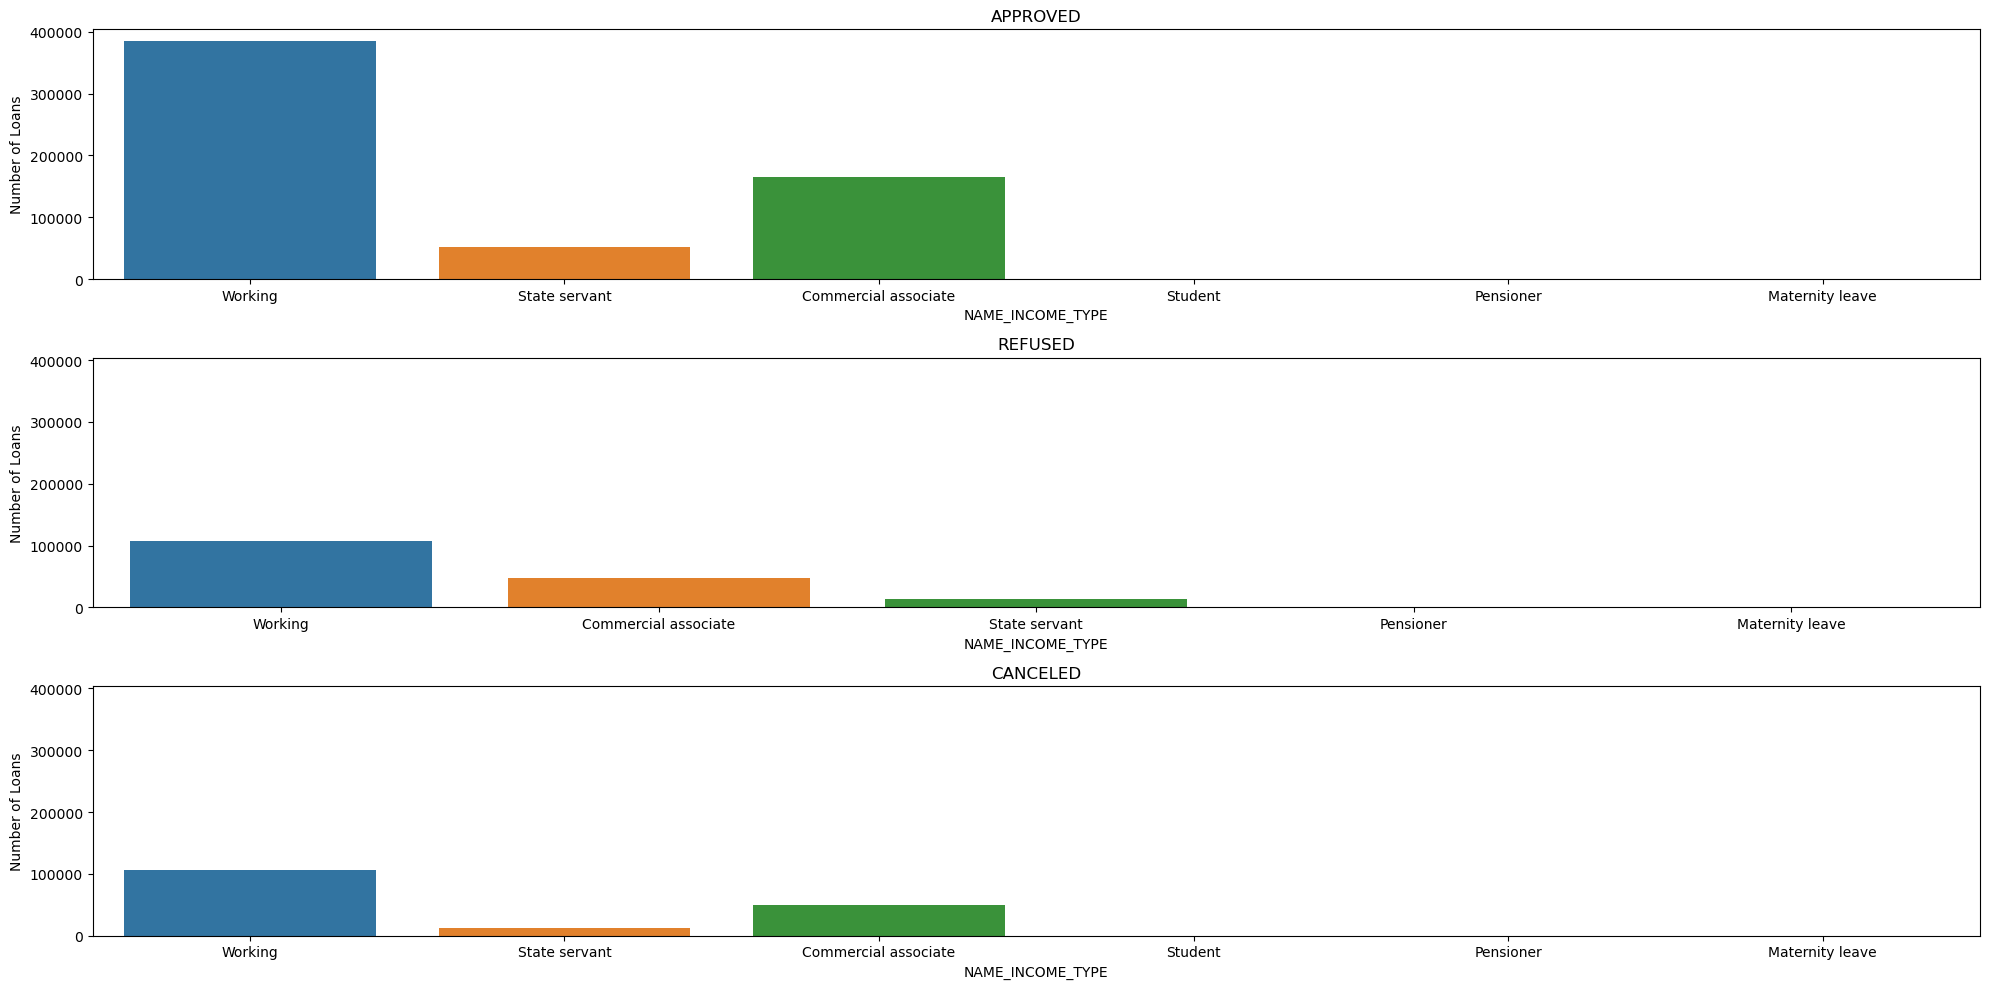

In [94]:
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=3,ncols=1,figsize=(20,10),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_application,x='NAME_INCOME_TYPE')
ax1.set_title('APPROVED')
ax1.set_xlabel('NAME_INCOME_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_application,x='NAME_INCOME_TYPE')
ax2.set_title('REFUSED')
ax2.set_xlabel('NAME_INCOME_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_application,x='NAME_INCOME_TYPE')
ax3.set_title('CANCELED')
ax3.set_xlabel('NAME_INCOME_TYPE')
ax3.set_ylabel('Number of Loans')

plt.tight_layout()
plt.show()

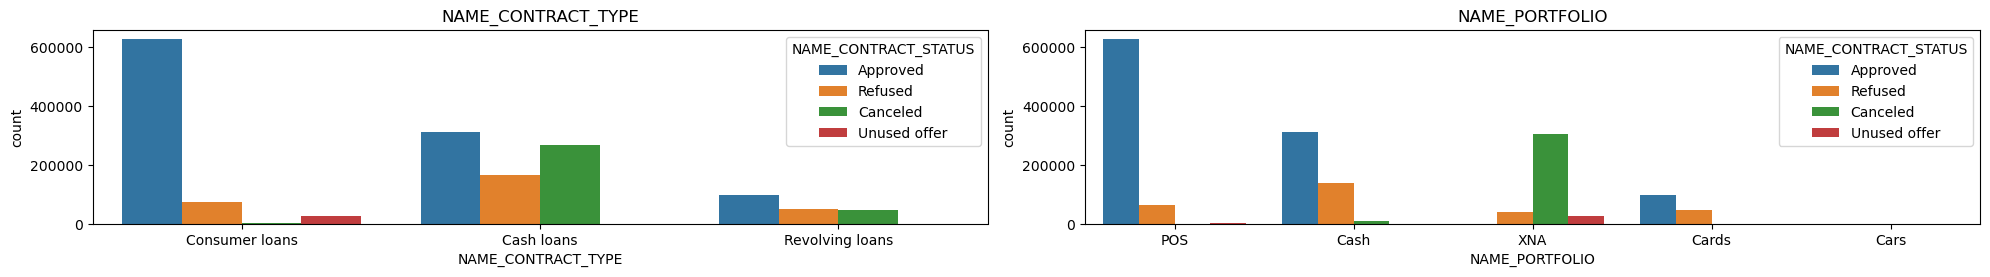

In [104]:
cols=['NAME_CONTRACT_TYPE','NAME_PORTFOLIO']


x = 4  
y = 2  
z = 1  

fig = plt.figure(figsize=(20,10))

for i in cols:

    plt.subplot(x, y, z)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=previous_application, hue='NAME_CONTRACT_STATUS')
    z = z + 1

fig.tight_layout()
plt.show()